In [45]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [56]:
Incidents = pd.read_csv('Incidents_Muestra.csv',sep=',')
Incidents.head()

,incident_datetime,incident_day_of_week,incident_code,incident_category,incident_subcategory,resolution,latitude,longitude,neighborhood,Police_district,...,resolution_cod,neighborhood_cod,Police_district_cod,Holiday_cod,Street_cod,week_cod,quarter_cod,season_cod,interval_hour_cod,interval_minutes_cod
0,2021-02-21 07:22:00,Sunday,65010,TRAFFIC VIOLATION ARREST,TRAFFIC VIOLATION ARREST,Cite or Arrest Adult,37.720693,-122.388056,Bayview Hunters Point,BAYVIEW,...,1,2,2,0,1086,3,3,2,5,2
1,2022-12-29 14:00:00,Thursday,12030,WEAPONS OFFENSE,WEAPONS OFFENSE,Cite or Arrest Adult,37.762229,-122.412844,Mission,MISSION,...,1,1,1,0,30,0,2,2,1,0
2,2022-04-27 16:00:00,Wednesday,6242,LARCENY THEFT,LARCENY - FROM VEHICLE,Open or Active,37.801654,-122.429667,Marina,NORTHERN,...,0,13,6,0,75,0,0,3,3,0
3,2022-07-06 14:15:00,Wednesday,7045,RECOVERED VEHICLE,RECOVERED VEHICLE,Open or Active,37.748504,-122.479296,Sunset/Parkside,TARAVAL,...,0,24,3,0,186,1,1,0,1,2
4,2022-03-29 19:52:00,Tuesday,6364,LARCENY THEFT,LARCENY THEFT - SHOPLIFTING,Open or Active,37.724533,-122.459213,Oceanview/Merced/Ingleside,TARAVAL,...,0,3,3,0,239,0,3,3,3,3


In [3]:
Incidents.shape

(30000, 35)

In [26]:
Incidents.columns

Index(['incident_datetime', 'incident_day_of_week', 'incident_code',
       'incident_category', 'incident_subcategory', 'resolution', 'latitude',
       'longitude', 'neighborhood', 'Police_district', 'Holiday', 'Street',
       'day', 'month', 'year', 'hour', 'minutes', 'week', 'quarter', 'season',
       'interval_hour', 'interval_minutes', 'incident_day_of_week_cod',
       'incident_category_cod', 'incident_subcategory_cod', 'resolution_cod',
       'neighborhood_cod', 'Police_district_cod', 'Holiday_cod', 'Street_cod',
       'week_cod', 'quarter_cod', 'season_cod', 'interval_hour_cod',
       'interval_minutes_cod', 'incidentCode_sca', 'incident_day_of_week_sca',
       'incident_category_sca', 'incident_subcategory_sca', 'resolution_sca',
       'neighborhood_sca', 'Police_district_sca', 'Holiday_sca', 'Street_sca',
       'week_sca', 'quarter_sca', 'season_sca', 'interval_hour_sca',
       'interval_minutes_sca'],
      dtype='object')

In [5]:
columnas_seleccionadas = [c for c in Incidents.columns if c.endswith(("code", "cod"))]


minimos = Incidents[columnas_seleccionadas].min()


maximos = Incidents[columnas_seleccionadas].max()


df_min_max = pd.DataFrame({'Mínimo': minimos, 'Máximo': maximos})


print(df_min_max)

                          Mínimo  Máximo
incident_code               1000   75030
incident_day_of_week_cod       0       6
incident_category_cod          0      47
incident_subcategory_cod       0      66
resolution_cod                 0       3
neighborhood_cod               0      41
Police_district_cod            0      10
Holiday_cod                    0       1
Street_cod                     0    1331
week_cod                       0       3
quarter_cod                    0       3
season_cod                     0       3
interval_hour_cod              0       5
interval_minutes_cod           0       3


In [57]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


columnas_seleccionadas = [c for c in Incidents.columns if c.endswith(("_code", "_cod"))]

for columna in columnas_seleccionadas:
    if columna.endswith("_code"):
        nombre_nuevo = columna[:-5] + "Code_sca"
    elif columna.endswith("_cod"):
        nombre_nuevo = columna[:-4] + "_sca"
    valores_escalados = scaler.fit_transform(Incidents[[columna]])
    Incidents[nombre_nuevo] = valores_escalados


print(Incidents.columns)


Index(['incident_datetime', 'incident_day_of_week', 'incident_code',
       'incident_category', 'incident_subcategory', 'resolution', 'latitude',
       'longitude', 'neighborhood', 'Police_district', 'Holiday', 'Street',
       'day', 'month', 'year', 'hour', 'minutes', 'week', 'quarter', 'season',
       'interval_hour', 'interval_minutes', 'incident_day_of_week_cod',
       'incident_category_cod', 'incident_subcategory_cod', 'resolution_cod',
       'neighborhood_cod', 'Police_district_cod', 'Holiday_cod', 'Street_cod',
       'week_cod', 'quarter_cod', 'season_cod', 'interval_hour_cod',
       'interval_minutes_cod', 'incidentCode_sca', 'incident_day_of_week_sca',
       'incident_category_sca', 'incident_subcategory_sca', 'resolution_sca',
       'neighborhood_sca', 'Police_district_sca', 'Holiday_sca', 'Street_sca',
       'week_sca', 'quarter_sca', 'season_sca', 'interval_hour_sca',
       'interval_minutes_sca'],
      dtype='object')


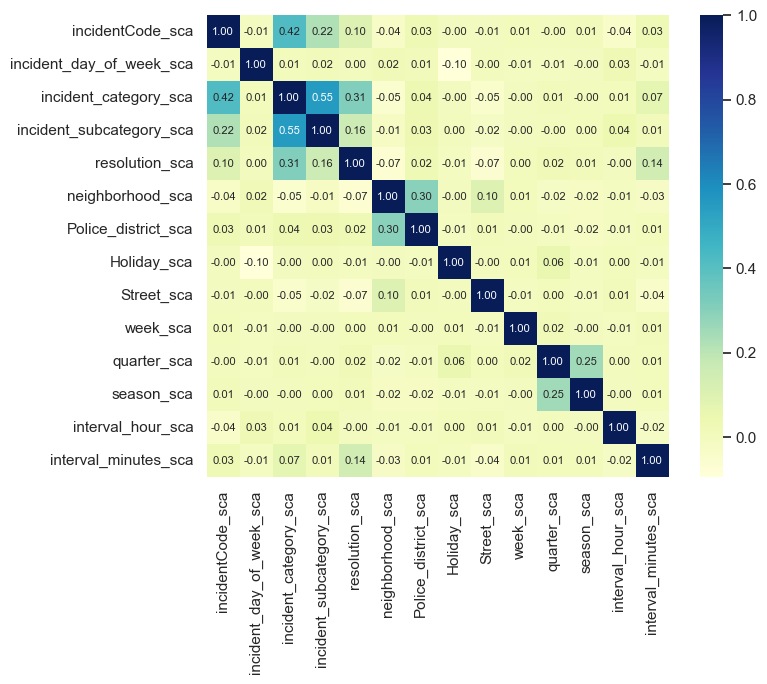

c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

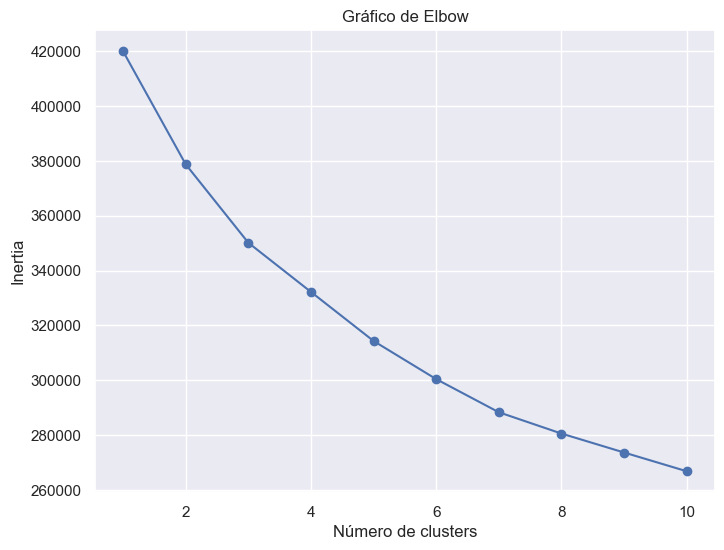

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


columnas_clust = [c for c in Incidents.columns if c.endswith(("sca"))]


df_clust = Incidents[columnas_clust]


correlation_matrix = df_clust.corr()


sns.set(font_scale=0.8)
sns.set(rc={"figure.figsize": (8, 6)})


sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 8}, square=True)
plt.show()


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_clust)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Gráfico de Elbow')
plt.show()


In [59]:

sample_train_clustering = df_clust

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from gower import gower_matrix

def calculate_scores(df, max_clusters, distance_metric):
    silhouette_scores = []
    calinski_scores = []
    elbow_scores = []

    for num_clusters in range(2, max_clusters+1):
        km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
        cluster_labels = km.fit_predict(df)

        if distance_metric == 'gower':
            
            numerical_cols = df.select_dtypes(include='number')
            distance_matrix = gower_matrix(numerical_cols.astype(float))
            silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
        else:
            silhouette_avg = silhouette_score(df, cluster_labels, metric=distance_metric)

        calinski_score = calinski_harabasz_score(df, cluster_labels)

        silhouette_scores.append(silhouette_avg)
        calinski_scores.append(calinski_score)

        
       

    return silhouette_scores, calinski_scores, elbow_scores

def main():
    
    df = sample_train_clustering

    
    max_clusters = 20
    distances = ['hamming', 'jaccard', 'gower']

    results = []
    result_df = pd.DataFrame(columns=['Distance', 'Clusters', 'Silhouette', 'Elbow', 'Calinski'])

    for distance_metric in distances:
        silhouette_scores, calinski_scores, elbow_scores = calculate_scores(df, max_clusters, distance_metric)
        results.append((distance_metric, silhouette_scores, calinski_scores, elbow_scores))

        for i, num_clusters in enumerate(range(2, max_clusters+1)):
            result_df.loc[i + (len(result_df) * len(distances))] = [distance_metric, num_clusters, silhouette_scores[i], elbow_scores[i], calinski_scores[i]]

    
    plt.figure()
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    for distance_metric, silhouette_scores, _, _ in results:
        num_clusters = range(2, max_clusters+1)
        plt.plot(num_clusters, silhouette_scores, label=distance_metric)

        max_score = max(silhouette_scores)
        min_score = min(silhouette_scores)
        max_index = silhouette_scores.index(max_score)
        min_index = silhouette_scores.index(min_score)

        print(f'{distance_metric}:')
        print(f'Max: {max_score:.2f} (Clusters: {num_clusters[max_index]})')
        print(f'Min: {min_score:.2f} (Clusters: {num_clusters[min_index]})')

    plt.legend()
    plt.xticks(np.arange(2, max_clusters+1, 1, dtype=int))
    plt.show()

  
    plt.figure()
    plt.title('Calinski-Harabasz Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Calinski-Harabasz Score')
    plt.grid(True)

    for distance_metric, _, calinski_scores, _ in results:
        num_clusters = range(2, max_clusters+1)
        plt.plot(num_clusters, calinski_scores, label=distance_metric)

        max_score = max(calinski_scores)
        min_score = min(calinski_scores)
        max_index = calinski_scores.index(max_score)
        min_index = calinski_scores.index(min_score)

        print(f'{distance_metric}:')
        print(f'Max: {max_score:.2f} (Clusters: {num_clusters[max_index]})')
        print(f'Min: {min_score:.2f} (Clusters: {num_clusters[min_index]})')

    plt.legend()
    plt.xticks(np.arange(2, max_clusters+1, 1, dtype=int))
    plt.show()

   
    plt.figure()
    plt.title('Elbow Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)

    for distance_metric, _, _, elbow_scores in results:
        num_clusters = range(2, max_clusters+1)
        plt.plot(num_clusters, elbow_scores, label=distance_metric)

        max_score = max(elbow_scores)
        min_score = min(elbow_scores)
        max_index = elbow_scores.index(max_score)
        min_index = elbow_scores.index(min_score)

        print(f'{distance_metric}:')
        print(f'Max: {max_score:.2f} (Clusters: {num_clusters[max_index]})')
        print(f'Min: {min_score:.2f} (Clusters: {num_clusters[min_index]})')

    plt.legend()
    plt.xticks(np.arange(2, max_clusters+1, 1, dtype=int))
    plt.show()

  
    print(result_df)

if __name__ == '__main__':
    main()


KeyboardInterrupt: 

Coeficiente de Silhouette: El valor obtenido de 0.0148 indica una baja cohesión y separación de los clusters. Un valor cercano a 0 sugiere que los puntos en los clusters están muy cerca de los puntos de los clusters vecinos, lo cual puede indicar una estructura de clustering débil.

Índice de Calinski-Harabasz: El valor obtenido de 64.1880 sugiere una relación moderada entre la dispersión intra-cluster y la dispersión inter-cluster. Un valor más alto indica una mejor estructura de clustering, lo cual implica que los clusters están bien definidos y separados entre sí.

Puntuación de Davies-Bouldin: El valor obtenido de 4.5645 indica que hay una alta medida de similitud entre cada cluster y su cluster más similar. Un valor más alto indica una estructura de clustering menos deseable, ya que implica una superposición significativa entre los clusters.

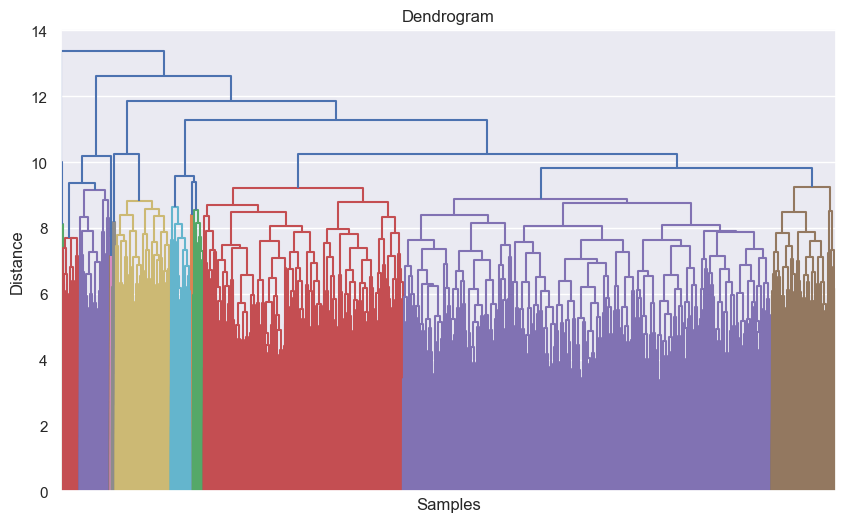

No se pueden calcular los coeficientes de silueta debido a un número insuficiente de clusters.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

data_clustering = sample_train_clustering

Z = linkage(data_clustering, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True, orientation='top')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Obtener los clusters a partir del dendrograma
max_d = 100  # distancia de corte para formar los clusters
clusters = fcluster(Z, max_d, criterion='distance')

n_clusters = len(set(clusters))
if n_clusters >= 2:
    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(data_clustering, clusters)
    print("Coeficiente de silueta:", silhouette_avg)
else:
    print("No se pueden calcular los coeficientes de silueta debido a un número insuficiente de clusters.")


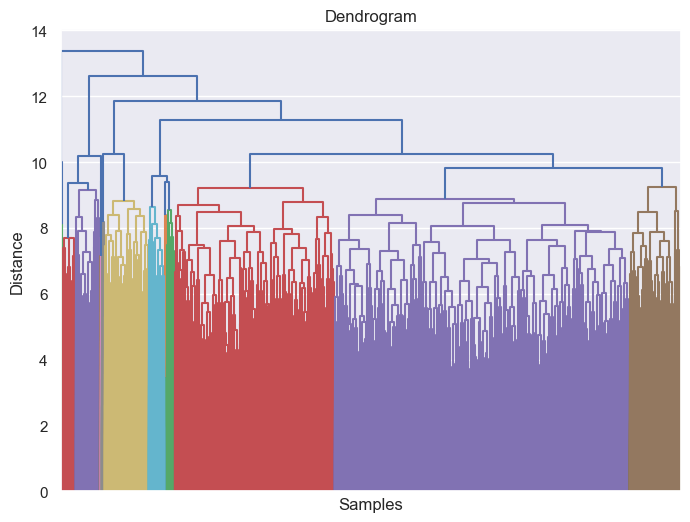

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar el clustering jerárquico aglomerativo
Z = linkage(data_clustering, method='complete')

# Calcular las alturas de los cortes en el dendrograma
dendrogram(Z, no_labels=True, orientation='top')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


